# Time Series Prediction of confirmed cases with Random Forest Regression using scikit-learn

*** V1.0 ***

tbd

tbd

tbd


In [1]:
# import standard libaries 
import pandas as pd
import numpy as np
import datetime

# import machine learning libaries

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

# Import standardized dataset
source_folder = "../../standardized_datasets/"
filename = "2020-05-27_filtered_countries_julius_complete.csv"

# filename = str(datetime.date.today())+'_filtered_countries_julius_complete.csv'

df = pd.read_csv(source_folder+filename, index_col=['country', 'date'])
df.drop(columns='cumulative_daily_change_total', inplace=True)

df

confirmed  deaths  recovered  hdi_2018  \
country date                                                 
USA     2020-01-22        1.0     0.0        0.0     0.920   
        2020-01-23        1.0     0.0        0.0     0.920   
        2020-01-24        2.0     0.0        0.0     0.920   
        2020-01-25        2.0     0.0        0.0     0.920   
        2020-01-26        5.0     0.0        0.0     0.920   
...                       ...     ...        ...       ...   
Kenya   2020-05-22     1161.0    50.0      380.0     0.579   
        2020-05-23     1192.0    50.0      380.0     0.579   
        2020-05-24     1214.0    51.0      383.0     0.579   
        2020-05-25     1286.0    52.0      402.0     0.579   
        2020-05-26     1348.0    52.0      405.0     0.579   

                    population_total_2020  population_density_2020  \
country date                                                         
USA     2020-01-22             331002.647                   36.185   
        2020-01-23             331002.647                   36.185   
        2020-01-24             331002.647                   36.185   
        2020-01-25             331002.647                   36.185   
        2020-01-26             331002.647                   36.185   
...                                   ...                      ...   
Kenya   2020-05-22              53771.300                   94.478   
        2020-05-23              53771.300                   94.478   
        2020-05-24              53771.300                   94.478   
        2020-05-25              53771.300                   94.478   
        2020-05-26              53771.300                   94.478   

                    cumulative_total  cumulative_total_per_thousand  retail  \
country date                                                                  
USA     2020-01-22               NaN                            NaN     NaN   
        2020-01-23               NaN                            NaN     NaN   
        2020-01-24               NaN                            NaN     NaN   
        2020-01-25               NaN                            NaN     NaN   
        2020-01-26               NaN                            NaN     NaN   
...                              ...                            ...     ...   
Kenya   2020-05-22               NaN                            NaN     NaN   
        2020-05-23               NaN                            NaN     NaN   
        2020-05-24               NaN                            NaN     NaN   
        2020-05-25               NaN                            NaN     NaN   
        2020-05-26               NaN                            NaN     NaN   

                    grocery and pharmacy  parks  transit stations  workplaces  \
country date                                                                    
USA     2020-01-22                   NaN    NaN               NaN         NaN   
        2020-01-23                   NaN    NaN               NaN         NaN   
        2020-01-24                   NaN    NaN               NaN         NaN   
        2020-01-25                   NaN    NaN               NaN         NaN   
        2020-01-26                   NaN    NaN               NaN         NaN   
...                                  ...    ...               ...         ...   
Kenya   2020-05-22                   NaN    NaN               NaN         NaN   
        2020-05-23                   NaN    NaN               NaN         NaN   
        2020-05-24                   NaN    NaN               NaN         NaN   
        2020-05-25                   NaN    NaN               NaN         NaN   
        2020-05-26                   NaN    NaN               NaN         NaN   

                    residential  driving  transit  walking  pm2.5 value  
country date                                                             
USA     2020-01-22          NaN     3.01     1.06    -2.96          NaN 

In [2]:
# Limit df to a country of interest for now

country_of_interest = 'Germany'

df_country_of_interest = df.loc[country_of_interest].sort_values(by='date')
pd.set_option('display.max_rows', 500)

# Important note: the dates here are only reasonable for coi == 'Germany' !!!
df_country_of_interest = df_country_of_interest.loc['2020-02-15':'2020-05-02']

df_country_of_interest.interpolate(inplace=True, limit_area=None)

df_country_of_interest

confirmed  deaths  recovered  hdi_2018  population_total_2020  \
date                                                                        
2020-02-15       16.0     0.0        1.0     0.939              83783.945   
2020-02-16       16.0     0.0        1.0     0.939              83783.945   
2020-02-17       16.0     0.0        1.0     0.939              83783.945   
2020-02-18       16.0     0.0       12.0     0.939              83783.945   
2020-02-19       16.0     0.0       12.0     0.939              83783.945   
2020-02-20       16.0     0.0       12.0     0.939              83783.945   
2020-02-21       16.0     0.0       14.0     0.939              83783.945   
2020-02-22       16.0     0.0       14.0     0.939              83783.945   
2020-02-23       16.0     0.0       14.0     0.939              83783.945   
2020-02-24       16.0     0.0       14.0     0.939              83783.945   
2020-02-25       17.0     0.0       14.0     0.939              83783.945   
2020-02-26       27.0     0.0       15.0     0.939              83783.945   
2020-02-27       46.0     0.0       16.0     0.939              83783.945   
2020-02-28       48.0     0.0       16.0     0.939              83783.945   
2020-02-29       79.0     0.0       16.0     0.939              83783.945   
2020-03-01      130.0     0.0       16.0     0.939              83783.945   
2020-03-02      159.0     0.0       16.0     0.939              83783.945   
2020-03-03      196.0     0.0       16.0     0.939              83783.945   
2020-03-04      262.0     0.0       16.0     0.939              83783.945   
2020-03-05      482.0     0.0       16.0     0.939              83783.945   
2020-03-06      670.0     0.0       17.0     0.939              83783.945   
2020-03-07      799.0     0.0       18.0     0.939              83783.945   
2020-03-08     1040.0     0.0       18.0     0.939              83783.945   
2020-03-09     1176.0     2.0       18.0     0.939              83783.945   
2020-03-10     1457.0     2.0       18.0     0.939              83783.945   
2020-03-11     1908.0     3.0       25.0     0.939              83783.945   
2020-03-12     2078.0     3.0       25.0     0.939              83783.945   
2020-03-13     3675.0     7.0       46.0     0.939              83783.945   
2020-03-14     4585.0     9.0       46.0     0.939              83783.945   
2020-03-15     5795.0    11.0       46.0     0.939              83783.945   
2020-03-16     7272.0    17.0       67.0     0.939              83783.945   
2020-03-17     9257.0    24.0       67.0     0.939              83783.945   
2020-03-18    12327.0    28.0      105.0     0.939              83783.945   
2020-03-19    15320.0    44.0      113.0     0.939              83783.945   
2020-03-20    19848.0    67.0      180.0     0.939              83783.945   
2020-03-21    22213.0    84.0      233.0     0.939              83783.945   
2020-03-22    24873.0    94.0      266.0     0.939              83783.945   
2020-03-23    29056.0   123.0      266.0     0.939              83783.945   
2020-03-24    32986.0   157.0     3243.0     0.939              83783.945   
2020-03-25    37323.0   206.0     3547.0     0.939              83783.945   
2020-03-26    43938.0   267.0     5673.0     0.939              83783.945   
2020-03-27    50871.0   342.0     6658.0     0.939              83783.945   
2020-03-28    57695.0   433.0     8481.0     0.939              83783.945   
2020-03-29    62095.0   533.0     9211.0     0.939              83783.945   
2020-03-30    66885.0   645.0    13500.0     0.939              83783.945   
2020-03-31    71808.0   775.0    16100.0     0.939              83783.945   
2020-04-01    77872.0   920.0    18700.0     0.939              83783.945   
2020-04-02    84794.0  1107.0    22440.0     0.939              83783.945   
2020-04-03    91159.0  1275.0    24575.0     0.939              83783.945   
2020-04-04    96092.0  1444.0    26400.0     0.939              83783.945   
2020-04-

In [3]:
# Extrapolation function to extrapolate the cumulative_total

def extrapolate(series):
    first_valid_entries = [0,0]
    i = 0
    for entry in series:
        if i == 2:
            break
        if np.isnan(entry) == False:
            first_valid_entries[i] = entry
            i = i + 1

    gradient = first_valid_entries[1] - first_valid_entries[0]
    index = int(np.flatnonzero(series == first_valid_entries[0]))
    while index > 0:
        series.iloc[index-1] = series.iloc[index] - gradient
        index = index - 1

    series[series < 0] = 0


extrapolate(df_country_of_interest.cumulative_total)
extrapolate(df_country_of_interest.cumulative_total_per_thousand)
df_country_of_interest

confirmed  deaths  recovered  hdi_2018  population_total_2020  \
date                                                                        
2020-02-15       16.0     0.0        1.0     0.939              83783.945   
2020-02-16       16.0     0.0        1.0     0.939              83783.945   
2020-02-17       16.0     0.0        1.0     0.939              83783.945   
2020-02-18       16.0     0.0       12.0     0.939              83783.945   
2020-02-19       16.0     0.0       12.0     0.939              83783.945   
2020-02-20       16.0     0.0       12.0     0.939              83783.945   
2020-02-21       16.0     0.0       14.0     0.939              83783.945   
2020-02-22       16.0     0.0       14.0     0.939              83783.945   
2020-02-23       16.0     0.0       14.0     0.939              83783.945   
2020-02-24       16.0     0.0       14.0     0.939              83783.945   
2020-02-25       17.0     0.0       14.0     0.939              83783.945   
2020-02-26       27.0     0.0       15.0     0.939              83783.945   
2020-02-27       46.0     0.0       16.0     0.939              83783.945   
2020-02-28       48.0     0.0       16.0     0.939              83783.945   
2020-02-29       79.0     0.0       16.0     0.939              83783.945   
2020-03-01      130.0     0.0       16.0     0.939              83783.945   
2020-03-02      159.0     0.0       16.0     0.939              83783.945   
2020-03-03      196.0     0.0       16.0     0.939              83783.945   
2020-03-04      262.0     0.0       16.0     0.939              83783.945   
2020-03-05      482.0     0.0       16.0     0.939              83783.945   
2020-03-06      670.0     0.0       17.0     0.939              83783.945   
2020-03-07      799.0     0.0       18.0     0.939              83783.945   
2020-03-08     1040.0     0.0       18.0     0.939              83783.945   
2020-03-09     1176.0     2.0       18.0     0.939              83783.945   
2020-03-10     1457.0     2.0       18.0     0.939              83783.945   
2020-03-11     1908.0     3.0       25.0     0.939              83783.945   
2020-03-12     2078.0     3.0       25.0     0.939              83783.945   
2020-03-13     3675.0     7.0       46.0     0.939              83783.945   
2020-03-14     4585.0     9.0       46.0     0.939              83783.945   
2020-03-15     5795.0    11.0       46.0     0.939              83783.945   
2020-03-16     7272.0    17.0       67.0     0.939              83783.945   
2020-03-17     9257.0    24.0       67.0     0.939              83783.945   
2020-03-18    12327.0    28.0      105.0     0.939              83783.945   
2020-03-19    15320.0    44.0      113.0     0.939              83783.945   
2020-03-20    19848.0    67.0      180.0     0.939              83783.945   
2020-03-21    22213.0    84.0      233.0     0.939              83783.945   
2020-03-22    24873.0    94.0      266.0     0.939              83783.945   
2020-03-23    29056.0   123.0      266.0     0.939              83783.945   
2020-03-24    32986.0   157.0     3243.0     0.939              83783.945   
2020-03-25    37323.0   206.0     3547.0     0.939              83783.945   
2020-03-26    43938.0   267.0     5673.0     0.939              83783.945   
2020-03-27    50871.0   342.0     6658.0     0.939              83783.945   
2020-03-28    57695.0   433.0     8481.0     0.939              83783.945   
2020-03-29    62095.0   533.0     9211.0     0.939              83783.945   
2020-03-30    66885.0   645.0    13500.0     0.939              83783.945   
2020-03-31    71808.0   775.0    16100.0     0.939              83783.945   
2020-04-01    77872.0   920.0    18700.0     0.939              83783.945   
2020-04-02    84794.0  1107.0    22440.0     0.939              83783.945   
2020-04-03    91159.0  1275.0    24575.0     0.939              83783.945   
2020-04-04    96092.0  1444.0    26400.0     0.939              83783.945   
2020-04-

In [4]:
#df_country_of_interest["confirmed"].plot()

Text(0.5, 1.0, 'Germany')

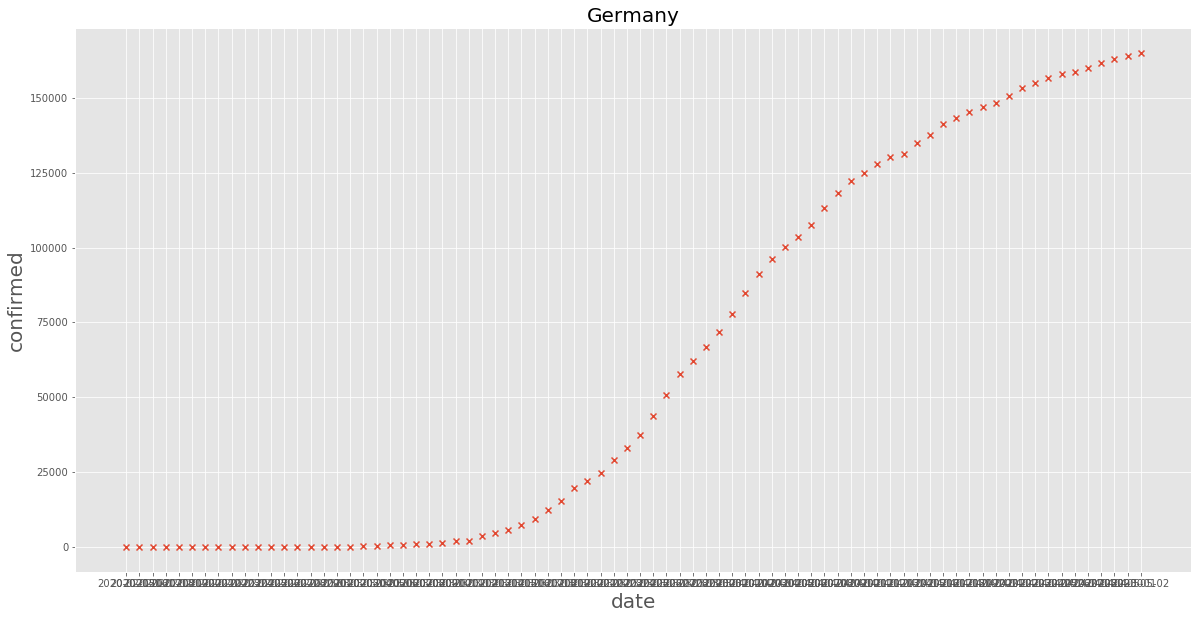

In [5]:
"""Plot time series"""
#df_single_country.plot.scatter(x='date', y='confirmed')
#ax = df_single_country.plot(x='confirmed')
plt.scatter(df_country_of_interest.index, df_country_of_interest['confirmed'], marker='x')
plt.xlabel('date', fontsize=20)
plt.ylabel('confirmed', fontsize=20)
plt.title(country_of_interest, fontsize=20)

#plt.savefig(country_of_interest+'before_svm'+'approx.png')

# Apply Random Forest Regression

In [6]:
df = df_country_of_interest
df.reset_index(inplace=True)
df

date  confirmed  deaths  recovered  hdi_2018  population_total_2020  \
0   2020-02-15       16.0     0.0        1.0     0.939              83783.945   
1   2020-02-16       16.0     0.0        1.0     0.939              83783.945   
2   2020-02-17       16.0     0.0        1.0     0.939              83783.945   
3   2020-02-18       16.0     0.0       12.0     0.939              83783.945   
4   2020-02-19       16.0     0.0       12.0     0.939              83783.945   
5   2020-02-20       16.0     0.0       12.0     0.939              83783.945   
6   2020-02-21       16.0     0.0       14.0     0.939              83783.945   
7   2020-02-22       16.0     0.0       14.0     0.939              83783.945   
8   2020-02-23       16.0     0.0       14.0     0.939              83783.945   
9   2020-02-24       16.0     0.0       14.0     0.939              83783.945   
10  2020-02-25       17.0     0.0       14.0     0.939              83783.945   
11  2020-02-26       27.0     0.0       15.0     0.939              83783.945   
12  2020-02-27       46.0     0.0       16.0     0.939              83783.945   
13  2020-02-28       48.0     0.0       16.0     0.939              83783.945   
14  2020-02-29       79.0     0.0       16.0     0.939              83783.945   
15  2020-03-01      130.0     0.0       16.0     0.939              83783.945   
16  2020-03-02      159.0     0.0       16.0     0.939              83783.945   
17  2020-03-03      196.0     0.0       16.0     0.939              83783.945   
18  2020-03-04      262.0     0.0       16.0     0.939              83783.945   
19  2020-03-05      482.0     0.0       16.0     0.939              83783.945   
20  2020-03-06      670.0     0.0       17.0     0.939              83783.945   
21  2020-03-07      799.0     0.0       18.0     0.939              83783.945   
22  2020-03-08     1040.0     0.0       18.0     0.939              83783.945   
23  2020-03-09     1176.0     2.0       18.0     0.939              83783.945   
24  2020-03-10     1457.0     2.0       18.0     0.939              83783.945   
25  2020-03-11     1908.0     3.0       25.0     0.939              83783.945   
26  2020-03-12     2078.0     3.0       25.0     0.939              83783.945   
27  2020-03-13     3675.0     7.0       46.0     0.939              83783.945   
28  2020-03-14     4585.0     9.0       46.0     0.939              83783.945   
29  2020-03-15     5795.0    11.0       46.0     0.939              83783.945   
30  2020-03-16     7272.0    17.0       67.0     0.939              83783.945   
31  2020-03-17     9257.0    24.0       67.0     0.939              83783.945   
32  2020-03-18    12327.0    28.0      105.0     0.939              83783.945   
33  2020-03-19    15320.0    44.0      113.0     0.939              83783.945   
34  2020-03-20    19848.0    67.0      180.0     0.939              83783.945   
35  2020-03-21    22213.0    84.0      233.0     0.939              83783.945   
36  2020-03-22    24873.0    94.0      266.0     0.939              83783.945   
37  2020-03-23    29056.0   123.0      266.0     0.939              83783.945   
38  2020-03-24    32986.0   157.0     3243.0     0.939              83783.945   
39  2020-03-25    37323.0   206.0     3547.0     0.939              83783.945   
40  2020-03-26    43938.0   267.0     5673.0     0.939              83783.945   
41  2020-03-27    50871.0   342.0     6658.0     0.939              83783.945   
42  2020-03-28    57695.0   433.0     8481.0     0.939              83783.945   
43  2020-03-29    62095.0   533.0     9211.0     0.939              83783.945   
44  2020-03-30    66885.0   645.0    13500.0     0.939              83783.945   
45  2020-03-31    71808.0   775.0    16100.0     0.939              83783.945   
46  2020-04-01    77872.0   920.0    18700.0     0.939              83783.945   
47  2020-04-02    84794.0  1107.0    22440.0     0.939              83783.945   
48  2020-04-03    91159.0  1275.0    2457

In [7]:
X = df.drop(['confirmed', 'deaths', 'recovered'], axis=1)
y = pd.DataFrame(df['confirmed'])

# same df as X, only keep confirmed for comparison with test values
X_eval = df.drop(['deaths', 'recovered'], axis=1)
#X_test_eval['confirmed_pred'] = pd.Series()

#X = df.drop('confirmed', axis=1).values
#y = df['confirmed'].values
X_eval

date  confirmed  hdi_2018  population_total_2020  \
0   2020-02-15       16.0     0.939              83783.945   
1   2020-02-16       16.0     0.939              83783.945   
2   2020-02-17       16.0     0.939              83783.945   
3   2020-02-18       16.0     0.939              83783.945   
4   2020-02-19       16.0     0.939              83783.945   
5   2020-02-20       16.0     0.939              83783.945   
6   2020-02-21       16.0     0.939              83783.945   
7   2020-02-22       16.0     0.939              83783.945   
8   2020-02-23       16.0     0.939              83783.945   
9   2020-02-24       16.0     0.939              83783.945   
10  2020-02-25       17.0     0.939              83783.945   
11  2020-02-26       27.0     0.939              83783.945   
12  2020-02-27       46.0     0.939              83783.945   
13  2020-02-28       48.0     0.939              83783.945   
14  2020-02-29       79.0     0.939              83783.945   
15  2020-03-01      130.0     0.939              83783.945   
16  2020-03-02      159.0     0.939              83783.945   
17  2020-03-03      196.0     0.939              83783.945   
18  2020-03-04      262.0     0.939              83783.945   
19  2020-03-05      482.0     0.939              83783.945   
20  2020-03-06      670.0     0.939              83783.945   
21  2020-03-07      799.0     0.939              83783.945   
22  2020-03-08     1040.0     0.939              83783.945   
23  2020-03-09     1176.0     0.939              83783.945   
24  2020-03-10     1457.0     0.939              83783.945   
25  2020-03-11     1908.0     0.939              83783.945   
26  2020-03-12     2078.0     0.939              83783.945   
27  2020-03-13     3675.0     0.939              83783.945   
28  2020-03-14     4585.0     0.939              83783.945   
29  2020-03-15     5795.0     0.939              83783.945   
30  2020-03-16     7272.0     0.939              83783.945   
31  2020-03-17     9257.0     0.939              83783.945   
32  2020-03-18    12327.0     0.939              83783.945   
33  2020-03-19    15320.0     0.939              83783.945   
34  2020-03-20    19848.0     0.939              83783.945   
35  2020-03-21    22213.0     0.939              83783.945   
36  2020-03-22    24873.0     0.939              83783.945   
37  2020-03-23    29056.0     0.939              83783.945   
38  2020-03-24    32986.0     0.939              83783.945   
39  2020-03-25    37323.0     0.939              83783.945   
40  2020-03-26    43938.0     0.939              83783.945   
41  2020-03-27    50871.0     0.939              83783.945   
42  2020-03-28    57695.0     0.939              83783.945   
43  2020-03-29    62095.0     0.939              83783.945   
44  2020-03-30    66885.0     0.939              83783.945   
45  2020-03-31    71808.0     0.939              83783.945   
46  2020-04-01    77872.0     0.939              83783.945   
47  2020-04-02    84794.0     0.939              83783.945   
48  2020-04-03    91159.0     0.939              83783.945   
49  2020-04-04    96092.0     0.939              83783.945   
50  2020-04-05   100123.0     0.939              83783.945   
51  2020-04-06   103374.0     0.939              83783.945   
52  2020-04-07   107663.0     0.939              83783.945   
53  2020-04-08   113296.0     0.939              83783.945   
54  2020-04-09   118181.0     0.939              83783.945   
55  2020-04-10   122171.0     0.939              83783.945   
56  2020-04-11   124908.0     0.939              83783.945   
57  2020-04-12   127854.0     0.939              83783.945   
58  2020-04-13   130072.0     0.939              83783.945   
59  2020-04-14   131359.0     0.939              83783.945   
60  2020-04-15   134753.0     0.939              83783.945   
61  2020-04-16   137698.0     0.939              83783.945   
62  2020-04-17   141397.0     0.939              83783.945   
63  2020-04-18   143342.0     0.939       

# 05.06.2020
# 2nd approach

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score,mean_squared_error

In [9]:
# Create training and test sets
split_val = 50

X_train = X[X.index < split_val]
y_train = y[y.index < split_val]

X_test = X[X.index >= split_val]
y_test = y[y.index >= split_val]

X_test_predict = X_eval[X.index >= split_val]

X.set_index('date', inplace=True)
X_train.set_index('date', inplace=True)
X_test.set_index('date', inplace=True)
df.set_index('date', inplace=True)

X_test

#_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

hdi_2018  population_total_2020  population_density_2020  \
date                                                                   
2020-04-05     0.939              83783.945                  240.372   
2020-04-06     0.939              83783.945                  240.372   
2020-04-07     0.939              83783.945                  240.372   
2020-04-08     0.939              83783.945                  240.372   
2020-04-09     0.939              83783.945                  240.372   
2020-04-10     0.939              83783.945                  240.372   
2020-04-11     0.939              83783.945                  240.372   
2020-04-12     0.939              83783.945                  240.372   
2020-04-13     0.939              83783.945                  240.372   
2020-04-14     0.939              83783.945                  240.372   
2020-04-15     0.939              83783.945                  240.372   
2020-04-16     0.939              83783.945                  240.372   
2020-04-17     0.939              83783.945                  240.372   
2020-04-18     0.939              83783.945                  240.372   
2020-04-19     0.939              83783.945                  240.372   
2020-04-20     0.939              83783.945                  240.372   
2020-04-21     0.939              83783.945                  240.372   
2020-04-22     0.939              83783.945                  240.372   
2020-04-23     0.939              83783.945                  240.372   
2020-04-24     0.939              83783.945                  240.372   
2020-04-25     0.939              83783.945                  240.372   
2020-04-26     0.939              83783.945                  240.372   
2020-04-27     0.939              83783.945                  240.372   
2020-04-28     0.939              83783.945                  240.372   
2020-04-29     0.939              83783.945                  240.372   
2020-04-30     0.939              83783.945                  240.372   
2020-05-01     0.939              83783.945                  240.372   
2020-05-02     0.939              83783.945                  240.372   

            cumulative_total  cumulative_total_per_thousand  retail  \
date                                                                  
2020-04-05      1.370655e+06                      16.359000   -58.0   
2020-04-06      1.424831e+06                      17.005714   -43.0   
2020-04-07      1.479007e+06                      17.652429   -44.0   
2020-04-08      1.533183e+06                      18.299143   -42.0   
2020-04-09      1.587360e+06                      18.945857   -40.0   
2020-04-10      1.641536e+06                      19.592571   -80.0   
2020-04-11      1.695712e+06                      20.239286   -56.0   
2020-04-12      1.749888e+06                      20.886000   -63.0   
2020-04-13      1.797035e+06                      21.448714   -81.0   
2020-04-14      1.844181e+06                      22.011429   -45.0   
2020-04-15      1.891328e+06                      22.574143   -45.0   
2020-04-16      1.938475e+06                      23.136857   -53.0   
2020-04-17      1.985622e+06                      23.699571   -55.0   
2020-04-18      2.032768e+06                      24.262286   -65.0   
2020-04-19      2.079915e+06                      24.825000   -59.0   
2020-04-20      2.131407e+06                      25.439571   -44.0   
2020-04-21      2.182899e+06                      26.054143   -47.0   
2020-04-22      2.234391e+06                      26.668714   -46.0   
2020-04-23      2.285882e+06                      27.283286   -47.0   
2020-04-24      2.337374e+06                      27.897857   -50.0   
2020-04-25      2.388866e+06                      28.512429   -57.0   
2020-04-26      2.440358e+06                      29.127000   -52.0   
2020-04-27      2.440358e+06                      29.127000   -43.0   
2020-04-28      2.440358e+06                      29.127000   -48.0   
2020-

In [10]:
# train_test_split?

In [11]:
# Fit the model

RF_Model = RandomForestRegressor(n_estimators=100)#, oob_score=True) #,max_features=1)

rgr = RF_Model.fit(X_train, y_train)

confirmed_predicted = rgr.predict(X)

#X_test_predict=pd.DataFrame(rgr.predict(X_test)).rename(columns={0:'predicted_confirmed'}).set_index('predicted_confirmed')
#X_train_predict=pd.DataFrame(rgr.predict(X_train)).rename(columns={0:'predicted_confirmed'}).set_index('predicted_confirmed')

#RF_predict = X_train_predict.append(X_test_predict)

#X_test_predict['predicted_confirmed'] = pd.DataFrame(rgr.predict(X_test))
X_test_predict.insert(1,'confirmed_predicted', rgr.predict(X_test))
#pd.DataFrame(rgr.predict(X_test))
#X_test_predict
X_test_predict

#df.insert(2, 'new-col', data)

/home/julius/miniconda3/envs/covid-19/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


date  confirmed_predicted  confirmed  hdi_2018  \
50  2020-04-05             82076.33   100123.0     0.939   
51  2020-04-06             82693.68   103374.0     0.939   
52  2020-04-07             82640.30   107663.0     0.939   
53  2020-04-08             82738.96   113296.0     0.939   
54  2020-04-09             82738.96   118181.0     0.939   
55  2020-04-10             84628.67   122171.0     0.939   
56  2020-04-11             83463.52   124908.0     0.939   
57  2020-04-12             82921.84   127854.0     0.939   
58  2020-04-13             82913.74   130072.0     0.939   
59  2020-04-14             82266.46   131359.0     0.939   
60  2020-04-15             83220.54   134753.0     0.939   
61  2020-04-16             82378.02   137698.0     0.939   
62  2020-04-17             82637.74   141397.0     0.939   
63  2020-04-18             81620.76   143342.0     0.939   
64  2020-04-19             81273.75   145184.0     0.939   
65  2020-04-20             81466.35   147065.0     0.939   
66  2020-04-21             81526.98   148291.0     0.939   
67  2020-04-22             81466.35   150648.0     0.939   
68  2020-04-23             80840.83   153129.0     0.939   
69  2020-04-24             80901.46   154999.0     0.939   
70  2020-04-25             82216.99   156513.0     0.939   
71  2020-04-26             80220.20   157770.0     0.939   
72  2020-04-27             81250.11   158758.0     0.939   
73  2020-04-28             81466.35   159912.0     0.939   
74  2020-04-29             80572.91   161539.0     0.939   
75  2020-04-30             80669.51   163009.0     0.939   
76  2020-05-01             82412.79   164077.0     0.939   
77  2020-05-02             80180.10   164967.0     0.939   

    population_total_2020  population_density_2020  cumulative_total  \
50              83783.945                  240.372      1.370655e+06   
51              83783.945                  240.372      1.424831e+06   
52              83783.945                  240.372      1.479007e+06   
53              83783.945                  240.372      1.533183e+06   
54              83783.945                  240.372      1.587360e+06   
55              83783.945                  240.372      1.641536e+06   
56              83783.945                  240.372      1.695712e+06   
57              83783.945                  240.372      1.749888e+06   
58              83783.945                  240.372      1.797035e+06   
59              83783.945                  240.372      1.844181e+06   
60              83783.945                  240.372      1.891328e+06   
61              83783.945                  240.372      1.938475e+06   
62              83783.945                  240.372      1.985622e+06   
63              83783.945                  240.372      2.032768e+06   
64              83783.945                  240.372      2.079915e+06   
65              83783.945                  240.372      2.131407e+06   
66              83783.945                  240.372      2.182899e+06   
67              83783.945                  240.372      2.234391e+06   
68              83783.945                  240.372      2.285882e+06   
69              83783.945                  240.372      2.337374e+06   
70              83783.945                  240.372      2.388866e+06   
71              83783.945                  240.372      2.440358e+06   
72              83783.945                  240.372      2.440358e+06   
73              83783.945                  240.372      2.440358e+06   
74              83783.945                  240.372      2.440358e+06   
75              83783.945                  240.372      2.440358e+06   
76              83783.945                  240.372      2.440358e+06   
77              83783.945                  240.372      2.440358e+06   

    cumulative_total_per_thousand  retail  grocery and pharmacy  parks  \
50                      16.359000   -58.0                 -13.0   61.0   
51                      17.00571

Text(0.5, 1.0, 'Germany')

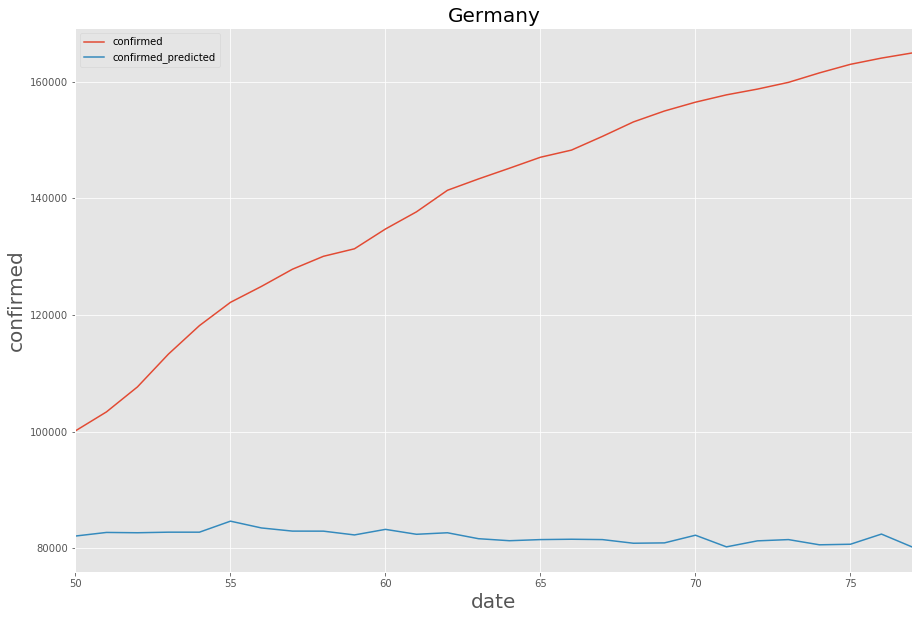

In [12]:
X_test_predict[['confirmed', 'confirmed_predicted']].plot(figsize=(15,10))
plt.xlabel('date', fontsize=20)
plt.ylabel('confirmed', fontsize=20)
plt.title(country_of_interest, fontsize=20)

#plt.savefig(str(datetime.date.today()) + '_RandomForest_' + country_of_interest + '_confirmed_predicted.png')

In [13]:
# RandomForestRegressor?

df_confirmed_predicted = pd.DataFrame(confirmed_predicted).rename(columns={0:'predicted_confirmed'}).set_index('predicted_confirmed')
df_confirmed_predicted

df.insert(1, 'confirmed_predicted', confirmed_predicted)

df

# Plot for whole dataset

df[['confirmed', 'confirmed_predicted']].plot(figsize=(15,10))
plt.xlabel('date', fontsize=20)
plt.ylabel('confirmed', fontsize=20)
plt.title(country_of_interest, fontsize=20)

#plt.scatter(df['confirmed'], df['confirmed_predicted'], marker='x')

# Evaluation of the model
# CAUTION: this includes the MSE for the same test and training data

mse_all = mean_squared_error(df['confirmed'].values, df['confirmed_predicted'].values)
rmse_all = np.sqrt(mse_all)
rmse_all

mean_squared_error?

RSquared_all = r2_score(df['confirmed'].values, df['confirmed_predicted'].values)
RSquared_all

r2_score?

# Evaluation of test data

df_test = df.reset_index()
df_test = df_test[df_test.index >= 70]
df_test.set_index('date', inplace=True)

mse_test = mean_squared_error(df_test['confirmed'].values, df_test['confirmed_predicted'].values)
rmse_test = np.sqrt(mse_test)
rmse_test

# How is this possible? Something is wrong here

RSquared_test = r2_score(df_test['confirmed'].values, df_test['confirmed_predicted'].values)
RSquared_test

# Plot only for test subset

df_test[['confirmed', 'confirmed_predicted']].plot(figsize=(15,10))
plt.xlabel('date', fontsize=20)
plt.ylabel('confirmed', fontsize=20)
plt.title(country_of_interest, fontsize=20)

In [14]:
df.tail()

confirmed  deaths  recovered  hdi_2018  population_total_2020  \
date                                                                        
2020-04-28   159912.0  6314.0   117400.0     0.939              83783.945   
2020-04-29   161539.0  6467.0   120400.0     0.939              83783.945   
2020-04-30   163009.0  6623.0   123500.0     0.939              83783.945   
2020-05-01   164077.0  6736.0   126900.0     0.939              83783.945   
2020-05-02   164967.0  6812.0   129000.0     0.939              83783.945   

            population_density_2020  cumulative_total  \
date                                                    
2020-04-28                  240.372         2440358.0   
2020-04-29                  240.372         2440358.0   
2020-04-30                  240.372         2440358.0   
2020-05-01                  240.372         2440358.0   
2020-05-02                  240.372         2440358.0   

            cumulative_total_per_thousand  retail  grocery and pharmacy  \
date                                                                      
2020-04-28                         29.127   -48.0                 -10.0   
2020-04-29                         29.127   -46.0                   1.0   
2020-04-30                         29.127   -34.0                  19.0   
2020-05-01                         29.127   -82.0                 -92.0   
2020-05-02                         29.127   -46.0                   3.0   

            parks  transit stations  workplaces  residential  driving  \
date                                                                    
2020-04-28   19.0             -43.0       -33.0         13.0   -30.96   
2020-04-29   12.0             -43.0       -33.0         13.0   -29.39   
2020-04-30   -8.0             -39.0       -34.0         12.0   -29.70   
2020-05-01   17.0             -67.0       -84.0         28.0   -37.54   
2020-05-02  -18.0             -42.0       -20.0          9.0   -34.09   

            transit  walking  pm2.5 value  
date                                       
2020-04-28   -53.60   -40.19         11.0  
2020-04-29   -54.45   -40.96         11.0  
2020-04-30   -54.93   -39.92         11.0  
2020-05-01   -54.25   -40.71         11.0  
2020-05-02   -55.10   -40.74         11.0

# 1st approach

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import seaborn as sns

# WITH PIPELINE
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('rf_regressor', RandomForestRegressor())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set: knn_scaled
rfr_scaled = pipeline.fit(X_train,y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
rfr_unscaled = RandomForestRegressor().fit(X_train, y_train)

# Training the model
#RandomForestRegModel.fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(rfr_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(rfr_unscaled.score(X_test, y_test)))

# Predicting with the model
y_pred = pipeline.predict(X_test)
y_pred

# Evaluation of the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse
